# Regression Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df1=pd.read_csv("cwcovid.csv")
df2=pd.read_csv("agecw.csv")
df1

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [3]:
df2

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [4]:
df2=df2.drop(['Country'],axis=1)

In [5]:
df= pd.concat([df1, df2], axis=1, sort=False)

In [6]:
df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,0.176,0.682,0.142
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,0.147,0.659,0.194
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,0.217,0.697,0.086
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0,0.177,0.638,0.185
...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0,NaN,NaN,NaN
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0,NaN,NaN,NaN
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0,NaN,NaN,NaN
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      6603 non-null   object 
 1   Country                   6603 non-null   object 
 2   Population                6603 non-null   int64  
 3   Total Tests               5505 non-null   float64
 4   Total Cases               6554 non-null   float64
 5   Total Deaths              5367 non-null   float64
 6   Total Recovered           6318 non-null   float64
 7   Serious or Critical       4117 non-null   float64
 8   Active Cases              6544 non-null   float64
 9   Fraction age 0-14 years   176 non-null    float64
 10  Fraction age 15-64 years  176 non-null    float64
 11  Fraction age 65+ years    176 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 619.2+ KB


In [8]:
df.isnull().sum()

Date                           0
Country                        0
Population                     0
Total Tests                 1098
Total Cases                   49
Total Deaths                1236
Total Recovered              285
Serious or Critical         2486
Active Cases                  59
Fraction age 0-14 years     6427
Fraction age 15-64 years    6427
Fraction age 65+ years      6427
dtype: int64

In [9]:
#filling missing data with imputation for numerical data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values  = np.nan, strategy = 'mean')
df['Fraction age 0-14 years']=imp.fit_transform(df['Fraction age 0-14 years'].values.reshape(-1,1))
df['Fraction age 15-64 years']=imp.fit_transform(df['Fraction age 15-64 years'].values.reshape(-1,1))
df['Fraction age 65+ years']=imp.fit_transform(df['Fraction age 65+ years'].values.reshape(-1,1))

In [10]:
df['Total Tests'].replace(np.nan, df['Total Cases'],inplace=True)

In [11]:
df['Total Tests'].replace(np.nan, 0,inplace=True)
df['Total Cases'].replace(np.nan, 0,inplace=True)
df['Active Cases'].replace(np.nan, 0,inplace=True)
df['Serious or Critical'].replace(np.nan, 0,inplace=True)

In [12]:
df['Total Deaths']=df['Total Cases']-(df['Total Recovered']+df['Active Cases'])

In [13]:
df['Total Recovered']=df['Total Cases']-df['Active Cases']-df["Total Deaths"]
tr=df['Total Cases']-df['Active Cases']

In [14]:
df['Total Recovered'].replace(np.nan, tr,inplace=True)

In [15]:
df['Total Deaths'].replace(np.nan,0,inplace=True)

In [16]:
df['Death rate']=df['Total Cases']/df['Total Deaths']

In [17]:
df['Death rate'].replace(np.inf,0,inplace=True)
df['Death rate'].replace(np.nan,0,inplace=True)

In [18]:
df.isnull().sum()

Date                        0
Country                     0
Population                  0
Total Tests                 0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Serious or Critical         0
Active Cases                0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
Death rate                  0
dtype: int64

In [19]:
df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Death rate
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189000,0.657000,0.154000,18.936587
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,0.176000,0.682000,0.142000,117.549521
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,0.147000,0.659000,0.194000,9.699945
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,0.217000,0.697000,0.086000,15.553579
4,2020-04-18,UK,67844241,460437.0,114217.0,0.0,15808.0,1559.0,98409.0,0.177000,0.638000,0.185000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,6.0,6.0,0.0,6.0,0.0,0.0,0.276098,0.636109,0.087731,0.000000
6599,2020-05-18,Western Sahara,595462,6.0,6.0,0.0,6.0,0.0,0.0,0.276098,0.636109,0.087731,0.000000
6600,2020-05-18,Anguilla,14987,3.0,3.0,0.0,3.0,0.0,0.0,0.276098,0.636109,0.087731,0.000000
6601,2020-05-18,Lesotho,2140235,1.0,1.0,0.0,0.0,0.0,1.0,0.276098,0.636109,0.087731,0.000000


In [20]:
cf=[]
nf=[] 
for fea in df.columns:
    if df[fea].dtype == 'O':
            cf.append(fea)
    else:
            nf.append(fea)
print(cf)
print('\n',nf)

['Date', 'Country']

 ['Population', 'Total Tests', 'Total Cases', 'Total Deaths', 'Total Recovered', 'Serious or Critical', 'Active Cases', 'Fraction age 0-14 years', 'Fraction age 15-64 years', 'Fraction age 65+ years', 'Death rate']


In [21]:
print('No of numerical features: ',len(nf))
print('No of categorical features: ',len(cf))

No of numerical features:  11
No of categorical features:  2


In [22]:
for col in cf:
    print(df[col].value_counts())
    print('no. of unique vales: ',len(df[col].value_counts()),'\n')

2020-05-12    213
2020-05-07    213
2020-05-06    213
2020-04-23    213
2020-05-10    213
2020-04-27    213
2020-04-22    213
2020-05-17    213
2020-05-18    213
2020-04-20    213
2020-04-26    213
2020-04-21    213
2020-05-08    213
2020-05-15    213
2020-05-09    213
2020-04-19    213
2020-05-04    213
2020-05-02    213
2020-05-16    213
2020-05-03    213
2020-04-28    213
2020-05-01    213
2020-04-29    213
2020-05-14    213
2020-05-05    213
2020-04-25    213
2020-04-24    213
2020-04-18    213
2020-05-11    213
2020-04-30    213
2020-05-13    213
Name: Date, dtype: int64
no. of unique vales:  31 

Falkland Islands    31
Qatar               31
Ivory Coast         31
Guinea-Bissau       31
Nepal               31
                    ..
Luxembourg          31
French Guiana       31
Cyprus              31
Brazil              31
Pakistan            31
Name: Country, Length: 213, dtype: int64
no. of unique vales:  213 



In [23]:
for col in nf:
    print(col,' : ',df[col].nunique()) 

Population  :  213
Total Tests  :  3500
Total Cases  :  3258
Total Deaths  :  1157
Total Recovered  :  2329
Serious or Critical  :  530
Active Cases  :  2680
Fraction age 0-14 years  :  137
Fraction age 15-64 years  :  119
Fraction age 65+ years  :  110
Death rate  :  3798


In [24]:
df['day']=pd.DatetimeIndex(df['Date']).day
df['month']=pd.DatetimeIndex(df['Date']).month

In [25]:
df=df.drop(['Date'],axis=1)

In [26]:
df.head()

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Death rate,day,month
0,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154,18.936587,18,4
1,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,0.176,0.682,0.142,117.549521,18,4
2,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,0.147,0.659,0.194,9.699945,18,4
3,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,0.217,0.697,0.086,15.553579,18,4
4,UK,67844241,460437.0,114217.0,0.0,15808.0,1559.0,98409.0,0.177,0.638,0.185,0.000000,18,4


# Statistics Summary

In [27]:
df.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Death rate,day,month
count,6.603000e+03,6.603000e+03,6.603000e+03,6603.000000,6603.000000,6603.000000,6.603000e+03,6603.000000,6603.000000,6603.000000,6603.000000,6603.000000,6603.000000
mean,3.637913e+07,1.811273e+05,1.680405e+04,991.836287,5937.099803,241.139331,9.875109e+03,0.276098,0.636109,0.087731,51.803775,15.580645,4.580645
std,1.411537e+08,6.980743e+05,8.829716e+04,5696.531962,23924.512917,1322.814259,6.512407e+04,0.017380,0.010834,0.010179,135.124488,8.526788,0.493491
min,8.010000e+02,0.000000e+00,0.000000e+00,-9353.000000,-50.000000,0.000000,0.000000e+00,0.115000,0.472000,0.011000,-363.294118,1.000000,4.000000
25%,8.672680e+05,8.215000e+02,7.600000e+01,1.000000,19.000000,0.000000,2.500000e+01,0.276098,0.636109,0.087731,7.376712,8.000000,4.000000
50%,6.859926e+06,1.137300e+04,5.940000e+02,10.000000,193.000000,2.000000,2.600000e+02,0.276098,0.636109,0.087731,20.250000,16.000000,5.000000
75%,2.546422e+07,1.019110e+05,4.757000e+03,99.000000,1380.000000,27.000000,1.991000e+03,0.276098,0.636109,0.087731,47.620587,23.000000,5.000000
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06,0.502000,0.850000,0.270000,2264.600000,30.000000,5.000000


# Data Visualisation

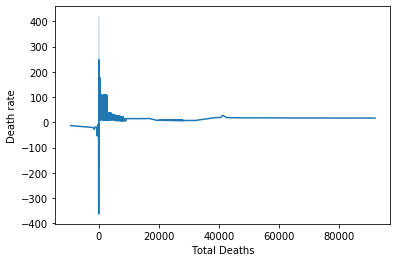

In [28]:
#bivariate analysis
sns.lineplot(x='Total Deaths',y='Death rate',data=df) 
plt.show()

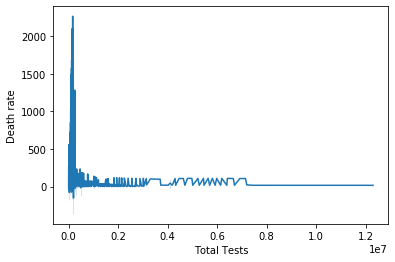

In [29]:
sns.lineplot(x='Total Tests',y='Death rate',data=df) 
plt.show()

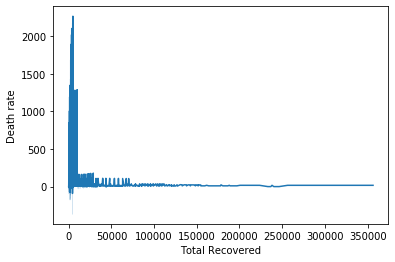

In [31]:
sns.lineplot(x='Total Recovered',y='Death rate',data=df) 
plt.show()

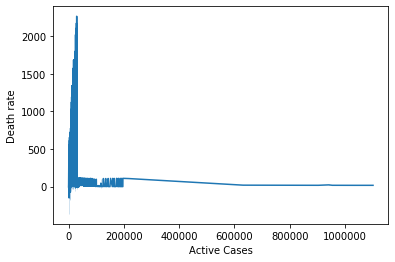

In [32]:
sns.lineplot(x='Active Cases',y='Death rate',data=df) 
plt.show()

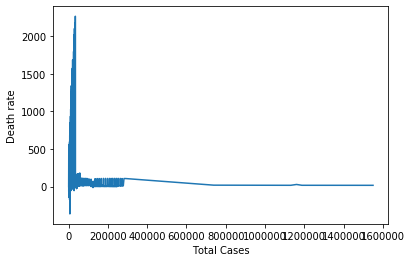

In [33]:
sns.lineplot(x='Total Cases',y='Death rate',data=df) 
plt.show()

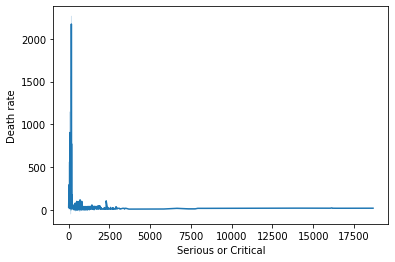

In [34]:
sns.lineplot(x='Serious or Critical',y='Death rate',data=df) 
plt.show()

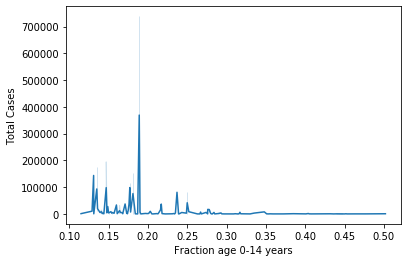

In [35]:
sns.lineplot(x='Fraction age 0-14 years',y='Total Cases',data=df) 
plt.show()

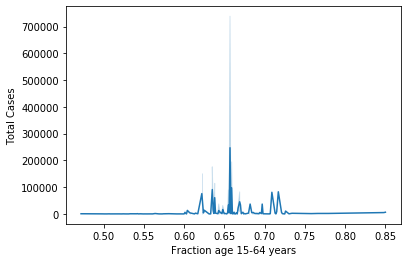

In [36]:
sns.lineplot(x='Fraction age 15-64 years',y='Total Cases',data=df) 
plt.show()

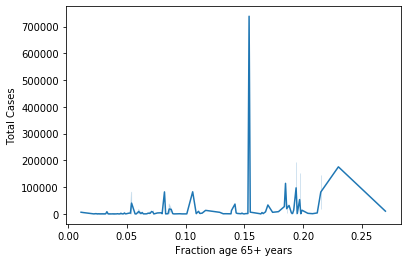

In [37]:
sns.lineplot(x='Fraction age 65+ years',y='Total Cases',data=df) 
plt.show()

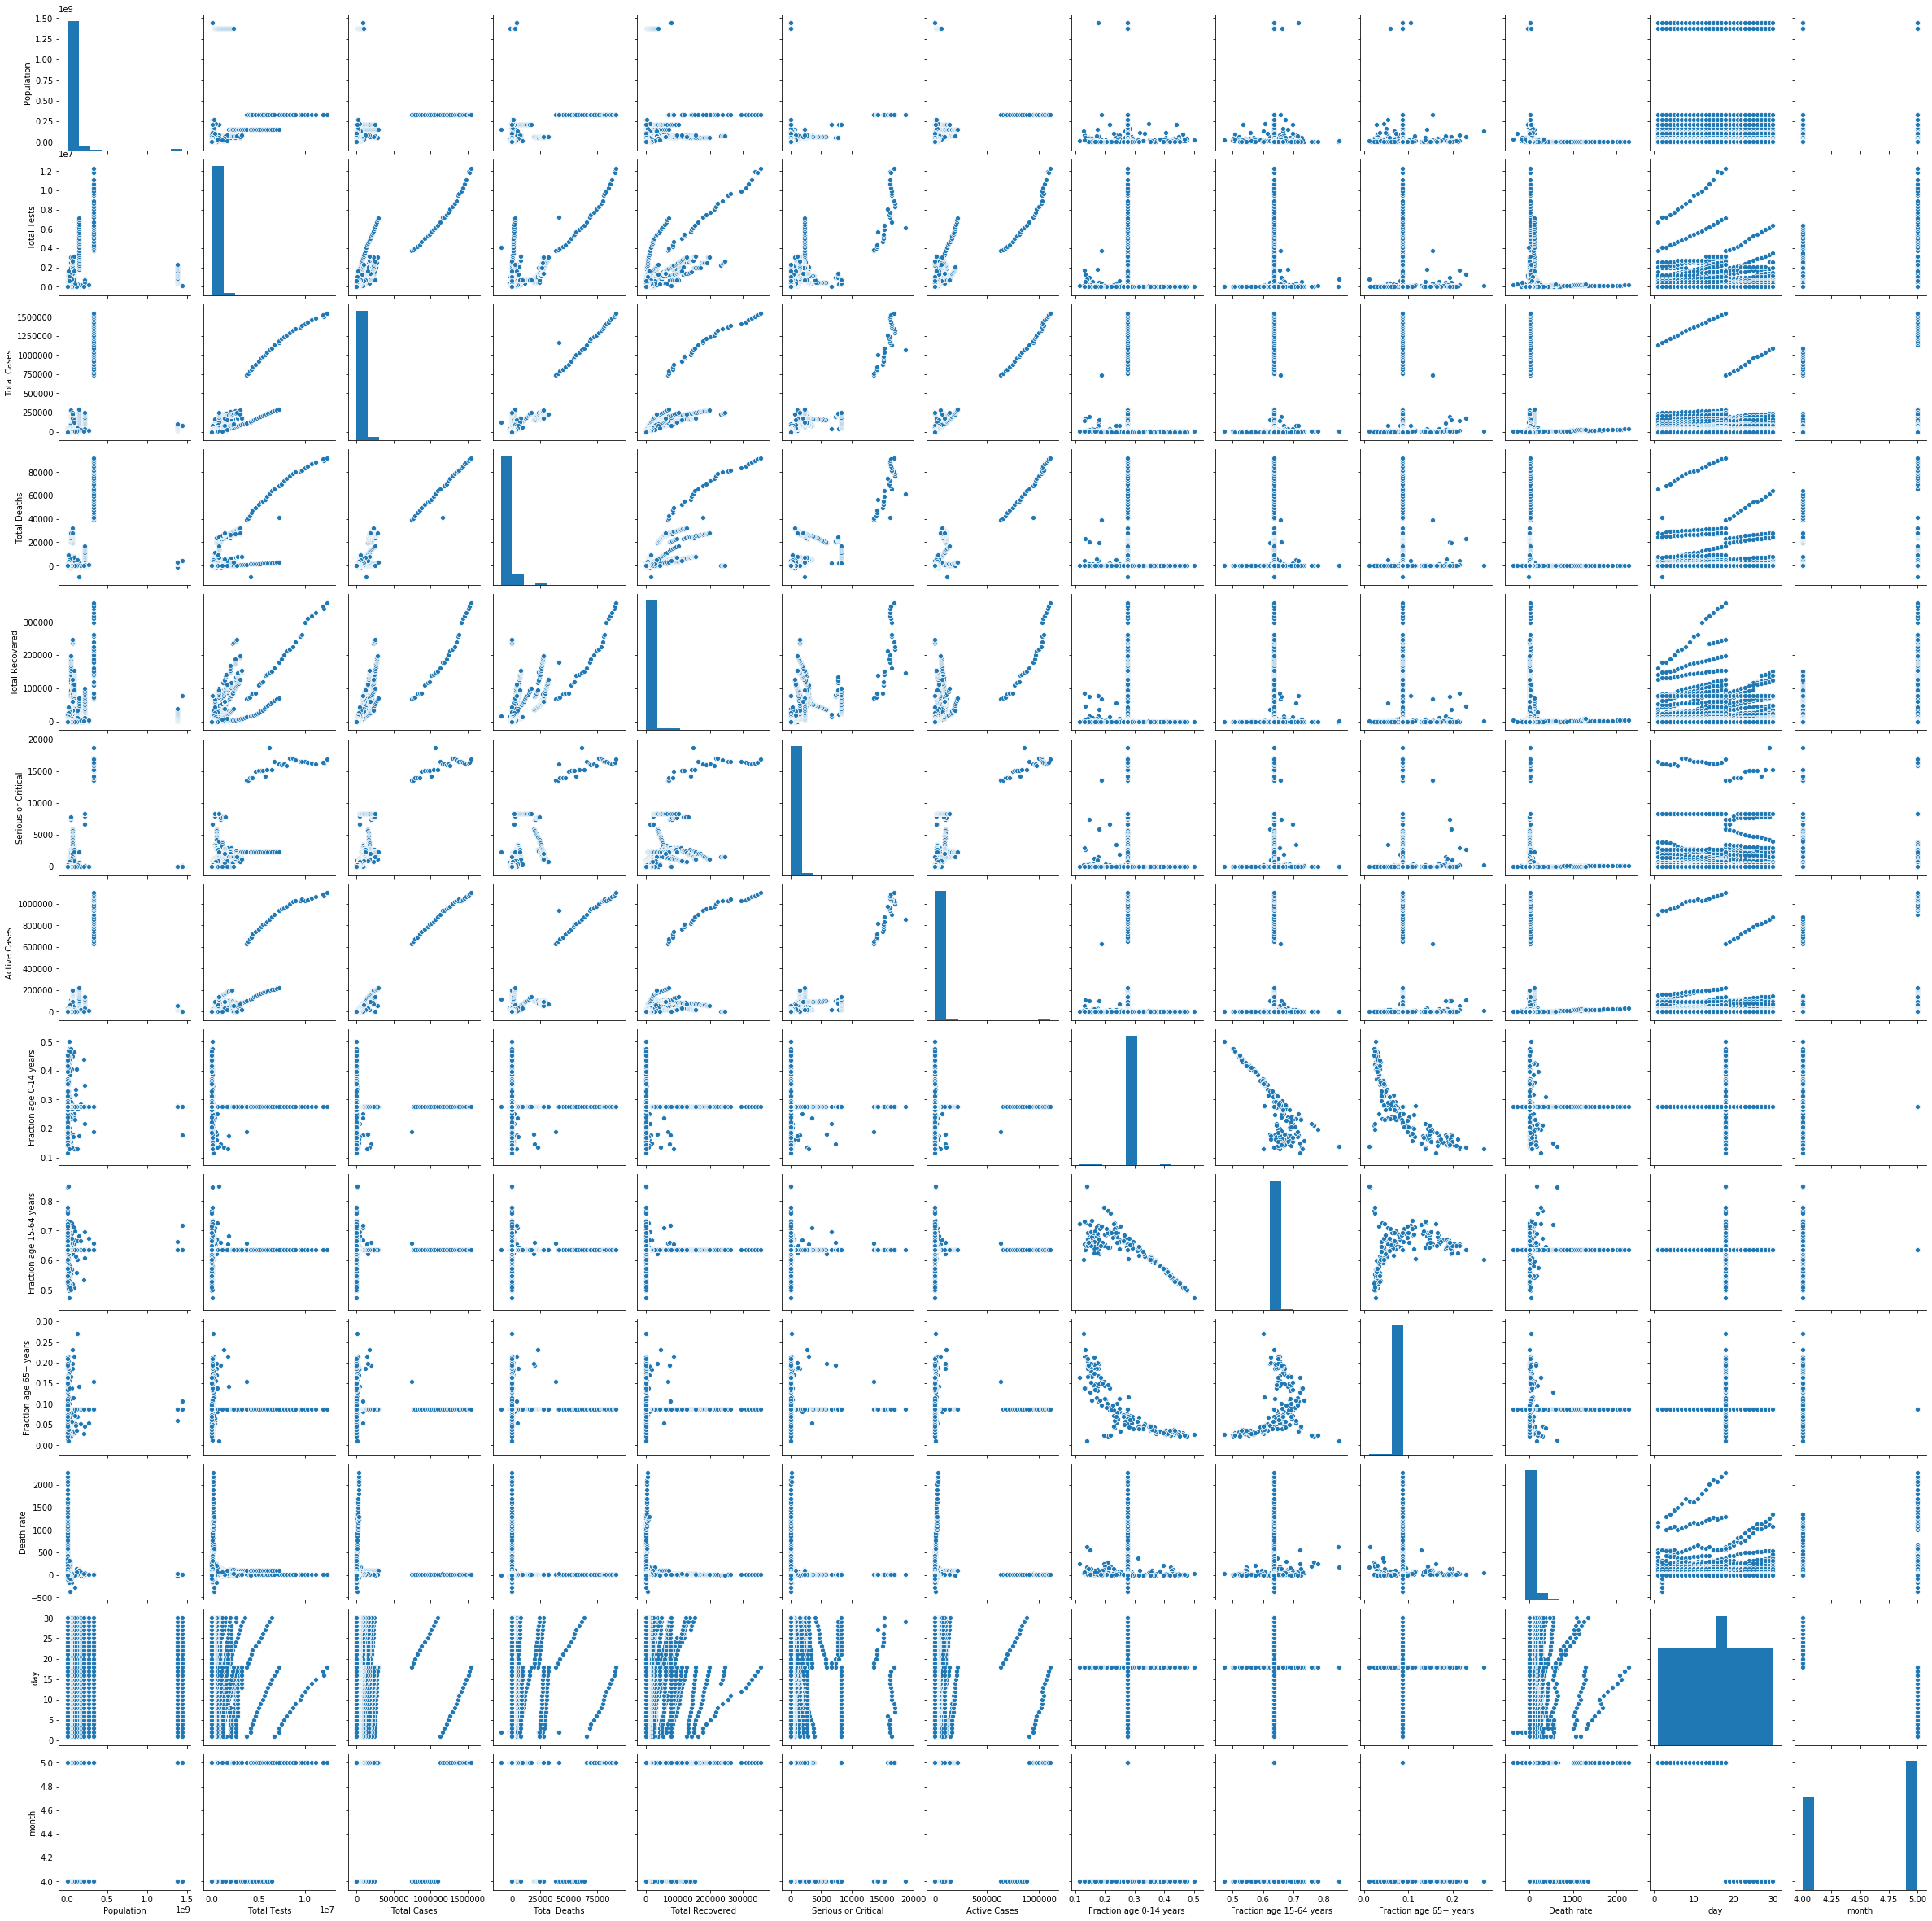

In [38]:
sns.pairplot(df)
plt.show()

In [39]:
df.corr()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Death rate,day,month
Population,1.000000e+00,0.222119,0.226144,0.188329,0.300911,0.172346,0.179594,-7.117800e-03,1.276377e-02,-1.314501e-03,-0.040090,6.038413e-18,-4.746909e-18
Total Tests,2.221192e-01,1.000000,0.898995,0.808343,0.797253,0.745877,0.855292,-2.311828e-02,1.347776e-02,2.521336e-02,-0.000435,-3.644059e-02,7.177832e-02
Total Cases,2.261439e-01,0.898995,1.000000,0.932787,0.814501,0.892289,0.975015,-2.145097e-02,8.231960e-03,2.792749e-02,-0.019152,-1.744909e-02,3.459394e-02
Total Deaths,1.883293e-01,0.808343,0.932787,1.000000,0.805278,0.847231,0.881395,-2.176077e-02,5.718568e-03,3.110575e-02,-0.046314,-1.203911e-02,2.770446e-02
Total Recovered,3.009107e-01,0.797253,0.814501,0.805278,1.000000,0.707313,0.666518,-2.224181e-02,1.148716e-02,2.583893e-02,-0.041533,-3.219927e-02,7.297185e-02
Serious or Critical,1.723458e-01,0.745877,0.892289,0.847231,0.707313,1.000000,0.875839,-3.329818e-02,1.387932e-02,4.216575e-02,-0.037519,1.101445e-02,-1.612111e-02
Active Cases,1.795941e-01,0.855292,0.975015,0.881395,0.666518,0.875839,1.000000,-1.900947e-02,6.440907e-03,2.565165e-02,-0.006658,-1.077593e-02,1.767260e-02
Fraction age 0-14 years,-7.117800e-03,-0.023118,-0.021451,-0.021761,-0.022242,-0.033298,-0.019009,1.000000e+00,-8.392592e-01,-8.151330e-01,-0.023882,-5.762625e-18,4.589104e-17
Fraction age 15-64 years,1.276377e-02,0.013478,0.008232,0.005719,0.011487,0.013879,0.006441,-8.392592e-01,1.000000e+00,3.692851e-01,0.039681,-2.887397e-17,1.030495e-16
Fraction age 65+ years,-1.314501e-03,0.025213,0.027927,0.031106,0.025839,0.042166,0.025652,-8.151330e-01,3.692851e-01,1.000000e+00,-0.001437,-1.428407e-17,-1.247266e-17


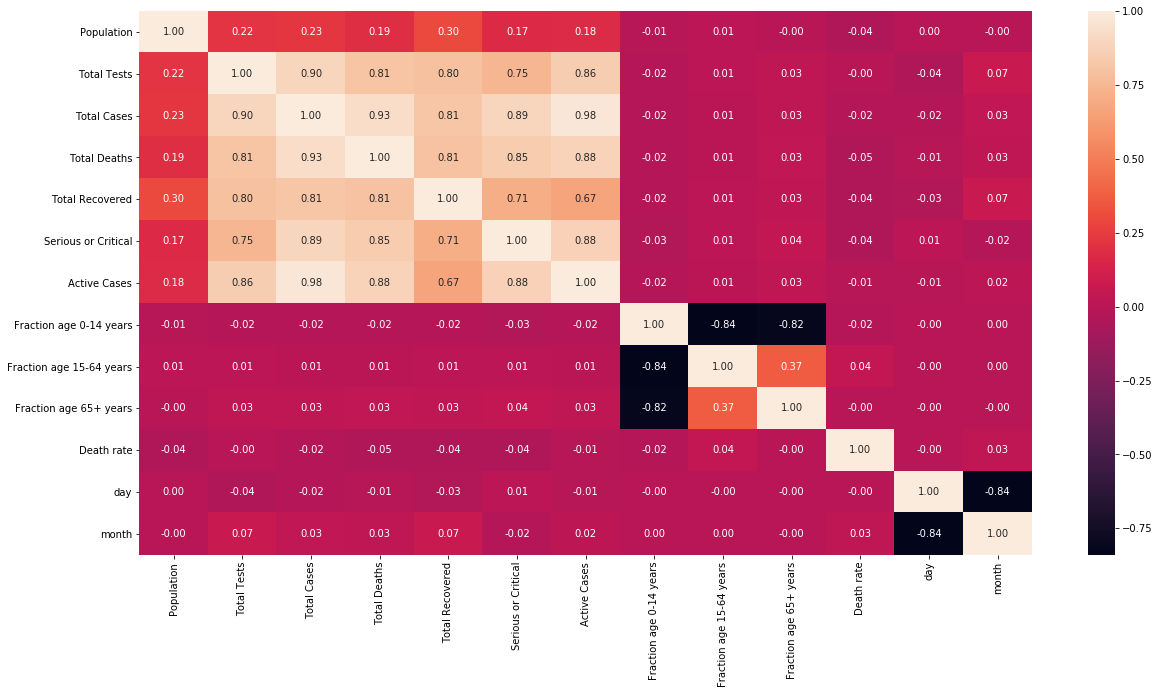

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

# Data Cleaning

In [41]:
df['Country']= df['Country'].astype('category').cat.codes

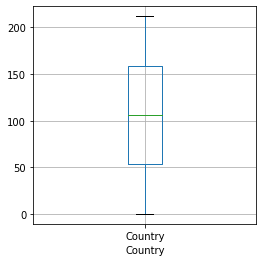

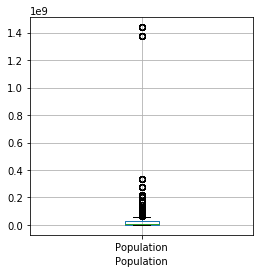

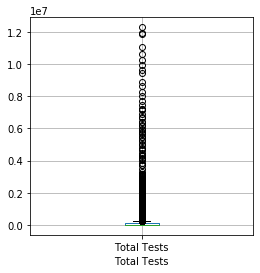

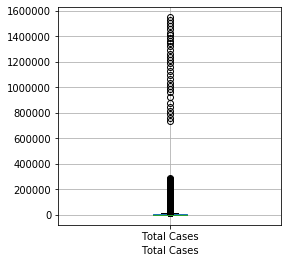

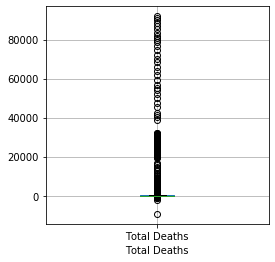

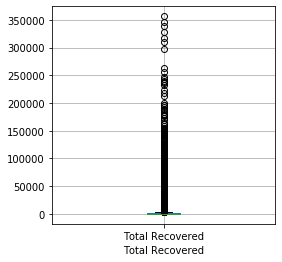

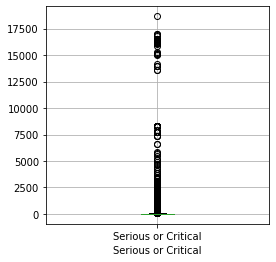

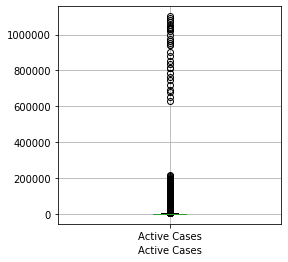

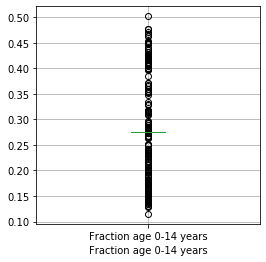

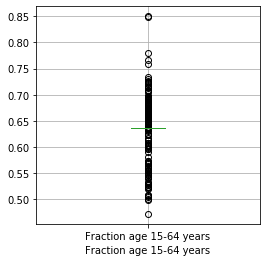

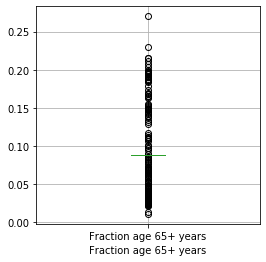

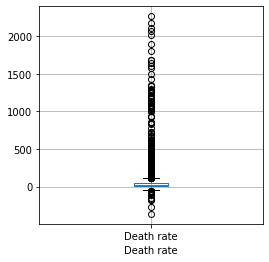

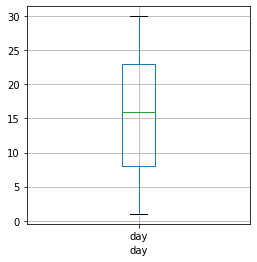

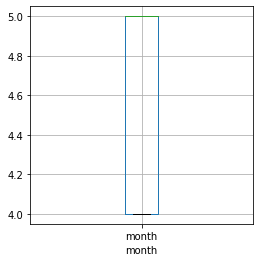

In [42]:
for i in df.columns:
        plt.figure(figsize = (4,4))
        df.boxplot(column=[i])
        plt.xlabel(i)

In [43]:
y=df["Death rate"]
dfx=df.drop(columns=['Death rate'], axis=1)

In [44]:
dfx.skew()

Country                      0.000000
Population                   8.743503
Total Tests                  9.305437
Total Cases                 12.079292
Total Deaths                 9.960248
Total Recovered              7.084647
Serious or Critical          9.246370
Active Cases                13.301451
Fraction age 0-14 years      2.162459
Fraction age 15-64 years    -0.741295
Fraction age 65+ years       4.715993
day                         -0.027570
month                       -0.326934
dtype: float64

In [45]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(dfx)
x=pd.DataFrame(x,columns=dfx.columns)
x.head()

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,day,month
0,1.545039,2.085796,5.072936,8.177416,6.675122,2.605554,10.062538,9.546101,-5.011859,1.928452,6.510713,0.283757,-1.176697
1,0.845705,0.776150,2.364920,0.226400,-0.119176,-0.120392,-0.176258,0.361612,-5.759917,4.236217,5.331758,0.283757,-1.176697
2,1.203504,0.073497,1.073180,2.011677,3.344597,2.878433,5.390326,1.377489,-7.428662,2.113074,10.440564,0.283757,-1.176697
3,-1.301085,1.246975,-0.169253,0.225596,0.240369,0.338127,4.833139,0.160627,-3.400657,5.620877,-0.170033,0.283757,-1.176697
4,1.528775,0.222931,0.400145,1.103323,-0.174125,0.412616,0.996331,1.359568,-5.702374,0.174551,9.556347,0.283757,-1.176697


# Model building

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [47]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(4424, 13) (2179, 13)
(4424,) (2179,)


In [48]:
maxrscore=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred= reg.predict(x_test)
    r2s=r2_score(y_test,y_pred)
    if r2s > maxrscore:
        maxrscore=r2s
        fr_state=r_state
print("max r2 score corresponding to ",fr_state," is ",maxrscore)

max r2 score corresponding to  96  is  0.01941312746559909


In [49]:
parameter = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10]}
svr = SVR()
grid = GridSearchCV( estimator=SVR(), param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.kernel)
print(grid.best_params_)
s=grid.best_estimator_.kernel

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
rbf
{'C': 10, 'kernel': 'rbf'}


In [50]:
parameter = {'n_neighbors':(3,5,7,9,11), 'weights':['uniform','distance']}
knn = KNeighborsRegressor()
grid = GridSearchCV( estimator=knn, param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.n_neighbors)
print(grid.best_estimator_.weights)
print(grid.best_params_)
k=grid.best_estimator_.n_neighbors
w=grid.best_estimator_.weights

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (3, 5, 7, 9, 11),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
3
distance
{'n_neighbors': 3, 'weights': 'distance'}


In [51]:
KNR=KNeighborsRegressor(n_neighbors=k,weights=w)
SV=SVR(kernel=s)
LR=LinearRegression()
LAR=Lasso()
RR=Ridge()
DT=DecisionTreeRegressor(random_state=fr_state)
RFR=RandomForestRegressor(random_state=fr_state)
ABR=AdaBoostRegressor(random_state=fr_state)
GBR=GradientBoostingRegressor(random_state=fr_state)

In [52]:
models = []
models.append(('KNeighborsRegressor', KNR))
models.append(('SVR', SV))
models.append(('LinearRegression', LR))
models.append(('LassoRegression', LAR))
models.append(('RidgeRegressor', RR))
models.append(('DecisionTreeRegressor', DT))
models.append(('RandomForestRegressor', RFR))
models.append(('AdaBoostRegressor', ABR))
models.append(('GradientBoostingRegressor',GBR))

In [53]:
Model = []
rmse = []
cvs=[]
r2score=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=fr_state)
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    y_pred=model.predict(x_test)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='r2').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    print("error:")
    r2s=r2_score(y_test,y_pred)
    print("r2 score is: ",r2s)
    r2score.append(r2s)
    print('\n')
    rmse1=np.sqrt(mean_squared_error(y_test,y_pred))
    print("root Mean squared error: ",rmse1)
    rmse.append(rmse1)
    print('\n')

*********************** KNeighborsRegressor ***********************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')


Cross_Val_Score =  0.6096024310333805


error:
r2 score is:  0.6522146503997753


root Mean squared error:  74.02924335573498


*********************** SVR ***********************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Cross_Val_Score =  -0.05249024025058824


error:
r2 score is:  -0.05152825528316707


root Mean squared error:  128.72358967064616


*********************** LinearRegression ***********************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


Cross_Val_Score =  0.009564865807195322


error:
r2 score is:  0.01941312746559909


root Mean squared error:  124.3056034578461

In [54]:
result = pd.DataFrame({'Model': Model, 'Cross_val_score':cvs,'r2_score':r2score,'root_mean_squared_error':rmse})
result

,Model,Cross_val_score,r2_score,root_mean_squared_error
0,KNeighborsRegressor,0.609602,0.652215,74.029243
1,SVR,-0.052490,-0.051528,128.723590
2,LinearRegression,0.009565,0.019413,124.305603
3,LassoRegression,0.008791,0.014899,124.591398
4,RidgeRegressor,0.009575,0.019445,124.303594
5,DecisionTreeRegressor,0.834406,0.968412,22.310588
6,RandomForestRegressor,0.891329,0.985467,15.133173
7,AdaBoostRegressor,0.524595,0.567979,82.508765
8,GradientBoostingRegressor,0.930534,0.972255,20.909296


# Saving the best model

In [55]:
from sklearn.externals import joblib

In [56]:
joblib.dump(GBR,'cwcovid.pkl')

['cwcovid.pkl']

In [57]:
model=joblib.load('cwcovid.pkl')

In [58]:
model.predict(x_test.head())

array([159.31744743,  58.05259734,  -0.98513384,  11.74976113,
        46.65478002])